## Decision Trees


In [1]:
# import packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from dmba import plotDecisionTree


## Find the Flag
How can you tell where the country is located just from it's national flag? What are some of the features that would clue you in? Maybe some of the colors are good indicators. The presence or absence of certain shapes could give you a hint. In this exericse, we'll use decision trees to try to predict the continent of flags based on several of these features.

We'll explore which features are the best to use and the best way to create your decision tree using _flgas.csv_. 

Attribute Information for this dataset from [UCI's Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Flags).

In [2]:
# Load dataset
flags = pd.read_csv("C:/Users/erwin/Desktop/MIS536/Module 7/DecTrees/flags.csv")

In [3]:
# Explore dataset
# print the columns and first few rows of the flags dataframe 

print(flags.head(3))
print(flags.columns)
print(flags.describe())


          Name  Landmass  Zone  Area  Population  Language  Religion  Bars  \
0  Afghanistan         5     1   648          16        10         2     0   
1      Albania         3     1    29           3         6         6     0   
2      Algeria         4     1  2388          20         8         2     2   

   Stripes  Colors  ...  Saltires  Quarters  Sunstars  Crescent  Triangle  \
0        3       5  ...         0         0         1         0         0   
1        0       3  ...         0         0         1         0         0   
2        0       3  ...         0         0         1         1         0   

   Icon  Animate Text  Topleft  Botright  
0     1        0    0    black     green  
1     0        1    0      red       red  
2     0        0    0    green     white  

[3 rows x 30 columns]
Index(['Name', 'Landmass', 'Zone', 'Area', 'Population', 'Language',
       'Religion', 'Bars', 'Stripes', 'Colors', 'Red', 'Green', 'Blue', 'Gold',
       'White', 'Black', 'Orange',

In [4]:
# Build X and y for analysis
# grab the color  columns from flags

X = flags[['Red', 'Green', 'Blue', 'Gold', 'White', 'Black', 'Orange']]
y = flags['Landmass']
# check 

print(X.head(),"\n", y.head())

   Red  Green  Blue  Gold  White  Black  Orange
0    1      1     0     1      1      1       0
1    1      0     0     1      0      1       0
2    1      1     0     0      1      0       0
3    1      0     1     1      1      0       1
4    1      0     1     1      0      0       0 
 0    5
1    3
2    4
3    6
4    3
Name: Landmass, dtype: int64


In [5]:
# split these DataFrames into a training set and test set 
training_X, valid_X, training_y, valid_y = train_test_split(X,y,random_state = 1)

print(training_X.shape)

(145, 7)


In [6]:
# call the constructor to create the tree
tree = DecisionTreeClassifier(random_state = 1)

In [7]:
# fit the tree
tree.fit(training_X,training_y)

DecisionTreeClassifier(random_state=1)

0.3469387755102041


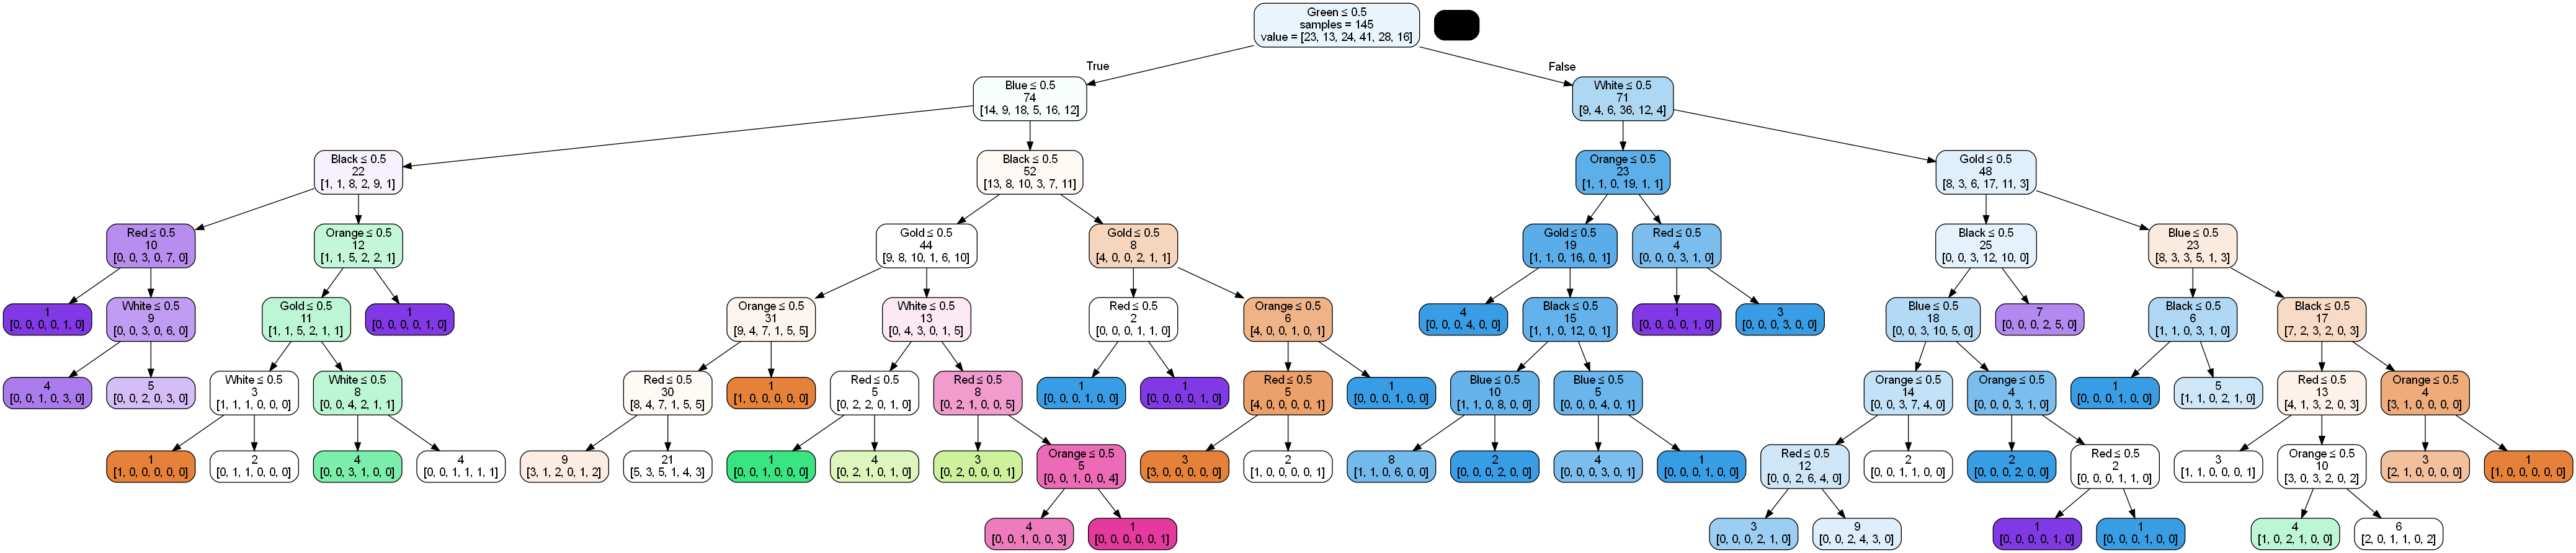

In [13]:
# print the prediction result 
print(tree.score(valid_X,valid_y))
plotDecisionTree(tree, feature_names = training_X.columns)

#the tree created had no pruning done, explaining why it's so huge and difficult to read. The size of this tree may even cause overfitting issues.

In [9]:
# Tuning the model
### Decision trees are prone to overfitting. to reduce the possibility of an error occurring in the tree, we need to do some fine tuning.
### We're going to decide how many internal node's we'll have on a decision tree. This means changing the "Max Depth" that a tree has. This is how we'll do our fine tuning of our tree
### This may sacrifice performance, but it'll make the tree easier to understand

# create the scores list 

scores = []
for i in range(1,21):           #we'll set the max depth of our tree ot 20
    tree = DecisionTreeClassifier(random_state = 1, max_depth = i)
    tree.fit(training_X, training_y)
    scores.append(tree.score(valid_X,valid_y))
    

print(scores)

  

[0.3469387755102041, 0.22448979591836735, 0.3469387755102041, 0.32653061224489793, 0.3469387755102041, 0.3469387755102041, 0.3469387755102041, 0.3469387755102041, 0.3469387755102041, 0.3469387755102041, 0.3469387755102041, 0.3469387755102041, 0.3469387755102041, 0.3469387755102041, 0.3469387755102041, 0.3469387755102041, 0.3469387755102041, 0.3469387755102041, 0.3469387755102041, 0.3469387755102041]


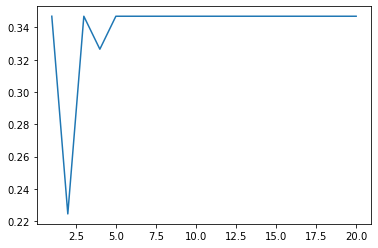

In [10]:
%matplotlib inline    

## ↑ this line basically forces the program to use matplotlib when plotting

plt.plot(range(1,21), scores)
plt.show()

In [11]:
# Prune the tree.


0.2857142857142857


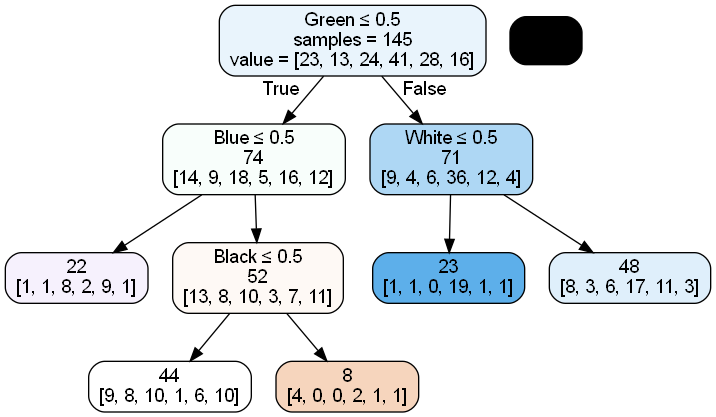

In [14]:
# other ways to prune the tree.

# random_state: controls the randomness of the estimator.
# min_samples_split: the minimum number of sampels required to split an internal node
# min_impurity_decrease: A node will be split if this split induces a decrease of the impurity greater than or equal to 0.01.
# max_depth: the maximum depth of the tree. If none, then nodes are expanded until all leaves are pure.

pruned_tree = DecisionTreeClassifier(random_state = 1, max_depth = 5, min_samples_split = 50, min_impurity_decrease = 0.01)
pruned_tree.fit(training_X, training_y)
print(pruned_tree.score(valid_X,valid_y))

plotDecisionTree(pruned_tree, feature_names = training_X.columns)